import libraries

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

load dataset

In [327]:
df = pd.read_csv('POWERGRID.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-10-05,POWERGRID,EQ,52.00,89.8,109.50,83.15,100.20,100.60,102.49,481058927,4.930561e+15,NaN,181390171,0.3771
1,2007-10-08,POWERGRID,EQ,100.60,104.0,104.00,94.85,95.30,95.45,98.12,71252858,6.991616e+14,NaN,22115293,0.3104
2,2007-10-09,POWERGRID,EQ,95.45,95.5,102.85,90.35,102.10,101.95,98.57,65658228,6.471784e+14,NaN,16991920,0.2588
3,2007-10-10,POWERGRID,EQ,101.95,104.6,105.00,102.00,102.65,102.90,103.66,38211410,3.960887e+14,NaN,16409289,0.4294
4,2007-10-11,POWERGRID,EQ,102.90,120.0,120.00,102.00,114.85,114.40,110.78,59805552,6.625235e+14,NaN,17530826,0.2931


analyze data

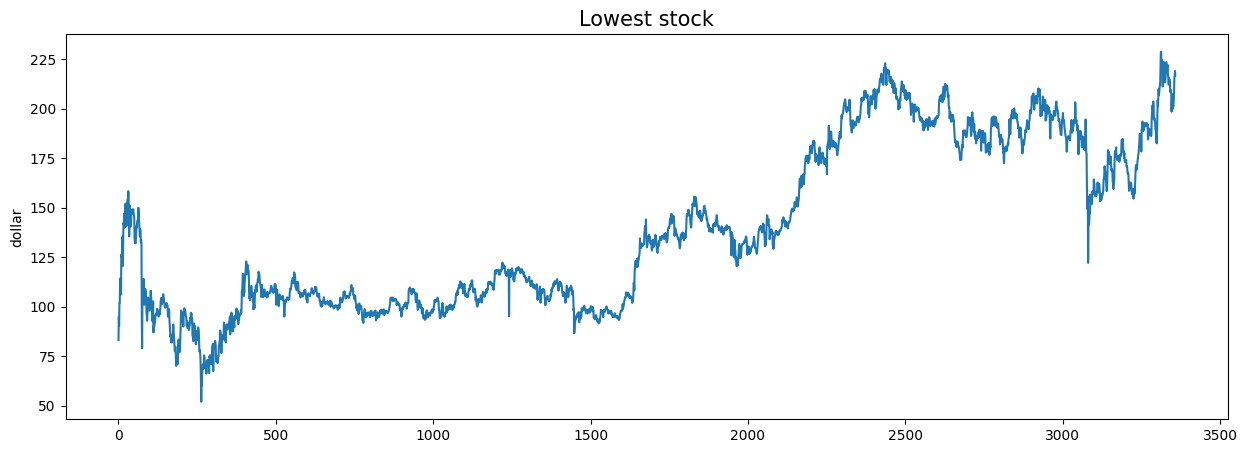

In [328]:
plt.figure(figsize=(15,5))
plt.plot(df['Low'])
plt.title('Lowest stock', fontsize=15)
plt.ylabel('dollar')
plt.show()

In [329]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                903
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [330]:
df = df.drop('Trades', axis=1)

In [331]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Deliverable Volume    0
%Deliverble           0
dtype: int64

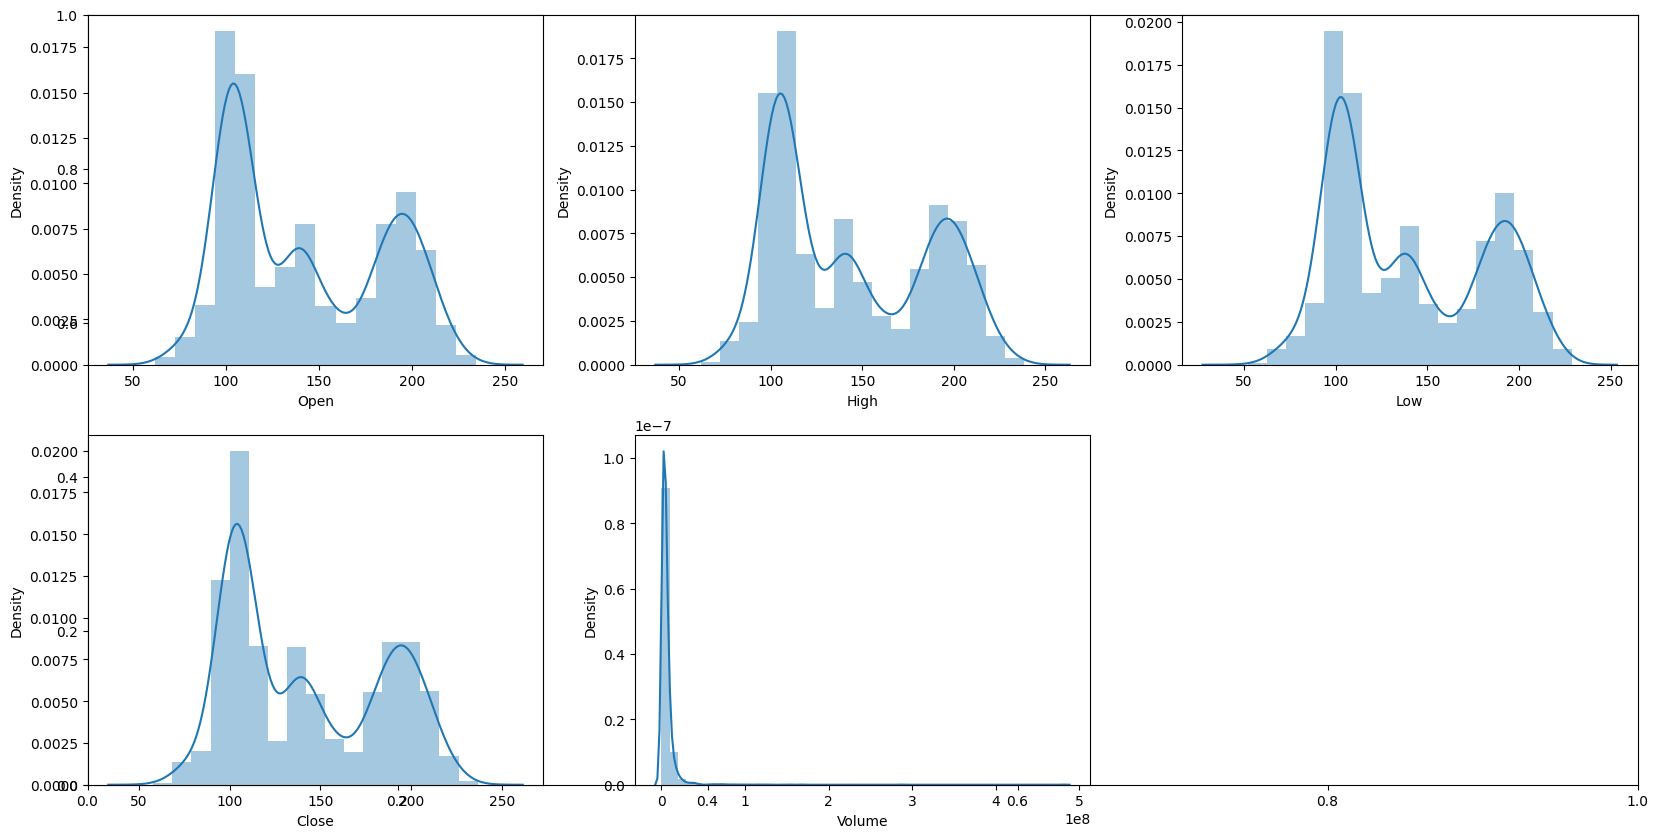

In [332]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

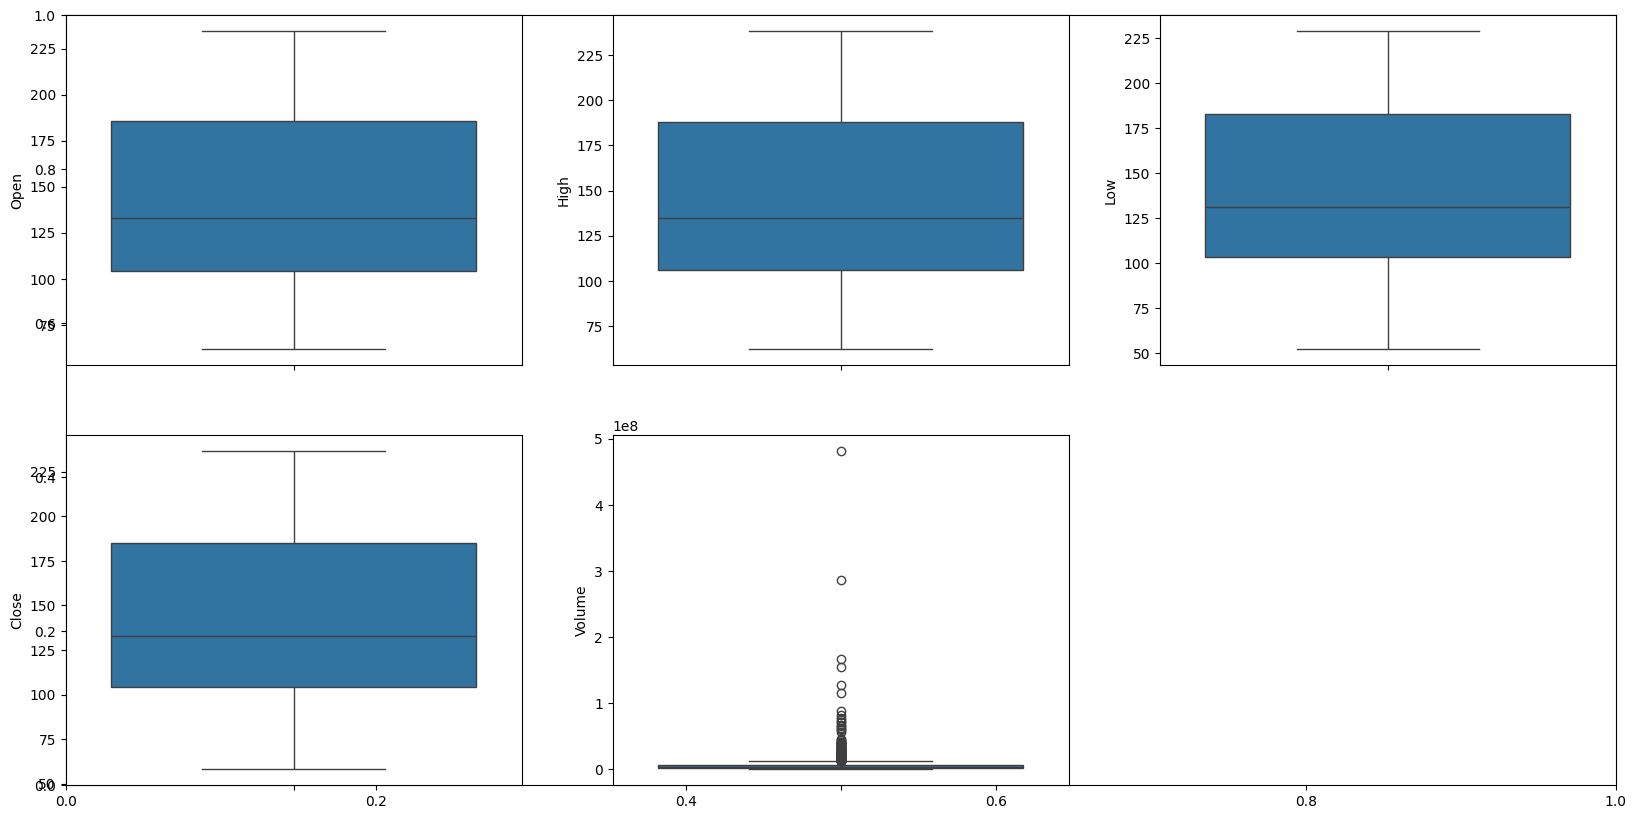

In [333]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [334]:
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,day,month,year
0,2007-10-05,POWERGRID,EQ,52.00,89.8,109.50,83.15,100.20,100.60,102.49,481058927,4.930561e+15,181390171,0.3771,5,10,2007
1,2007-10-08,POWERGRID,EQ,100.60,104.0,104.00,94.85,95.30,95.45,98.12,71252858,6.991616e+14,22115293,0.3104,8,10,2007
2,2007-10-09,POWERGRID,EQ,95.45,95.5,102.85,90.35,102.10,101.95,98.57,65658228,6.471784e+14,16991920,0.2588,9,10,2007
3,2007-10-10,POWERGRID,EQ,101.95,104.6,105.00,102.00,102.65,102.90,103.66,38211410,3.960887e+14,16409289,0.4294,10,10,2007
4,2007-10-11,POWERGRID,EQ,102.90,120.0,120.00,102.00,114.85,114.40,110.78,59805552,6.625235e+14,17530826,0.2931,11,10,2007


In [335]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,day,month,year,is_quarter_end
0,2007-10-05,POWERGRID,EQ,52.00,89.8,109.50,83.15,100.20,100.60,102.49,481058927,4.930561e+15,181390171,0.3771,5,10,2007,0
1,2007-10-08,POWERGRID,EQ,100.60,104.0,104.00,94.85,95.30,95.45,98.12,71252858,6.991616e+14,22115293,0.3104,8,10,2007,0
2,2007-10-09,POWERGRID,EQ,95.45,95.5,102.85,90.35,102.10,101.95,98.57,65658228,6.471784e+14,16991920,0.2588,9,10,2007,0
3,2007-10-10,POWERGRID,EQ,101.95,104.6,105.00,102.00,102.65,102.90,103.66,38211410,3.960887e+14,16409289,0.4294,10,10,2007,0
4,2007-10-11,POWERGRID,EQ,102.90,120.0,120.00,102.00,114.85,114.40,110.78,59805552,6.625235e+14,17530826,0.2931,11,10,2007,0


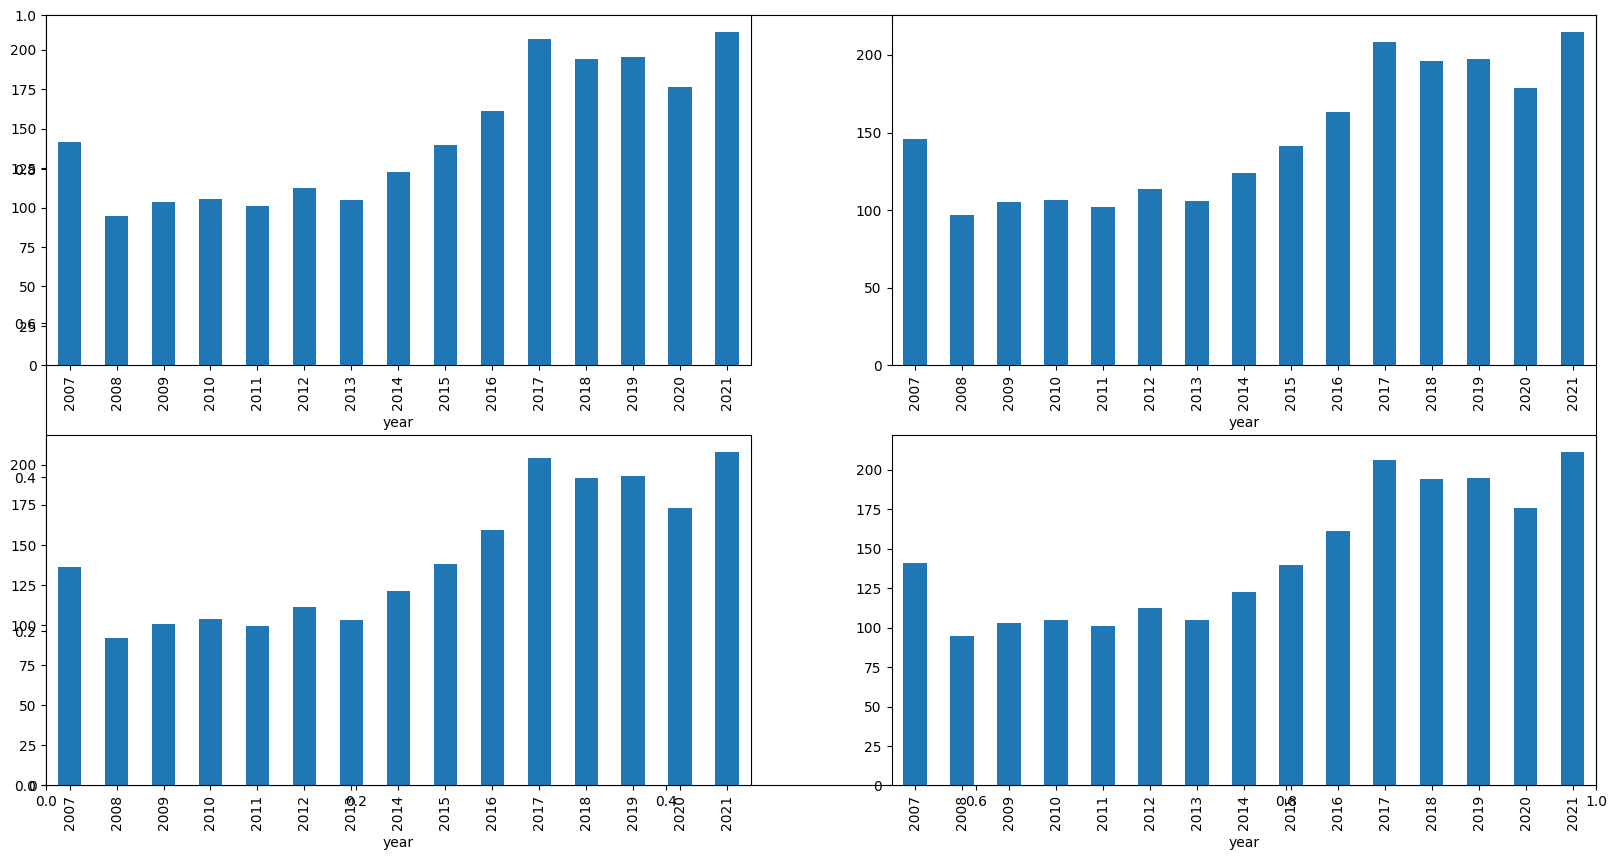

In [336]:
data_grouped = df.drop('Date', axis=1).groupby('year').mean(numeric_only=True)
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


In [337]:
df.drop('Date', axis=1).groupby('is_quarter_end').mean(numeric_only=True)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Deliverable Volume,%Deliverble,day,month,year
is_quarter_end,,,,,,,,,,,,,,
0,141.692538,141.908847,143.764231,139.846649,141.764477,141.770777,141.828543,6.046885e+06,9.063143e+13,3.445638e+06,0.590565,15.847632,5.970956,2014.071939
1,140.612578,140.675513,142.500580,138.712979,140.590589,140.606289,140.624924,5.963549e+06,8.832136e+13,3.613083e+06,0.594576,15.664585,7.517395,2013.994648


In [338]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Prev Close'] > df['Close'], 1, 0)

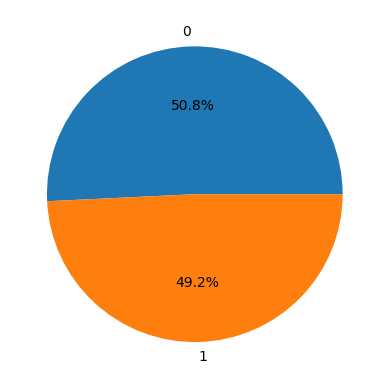

In [339]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

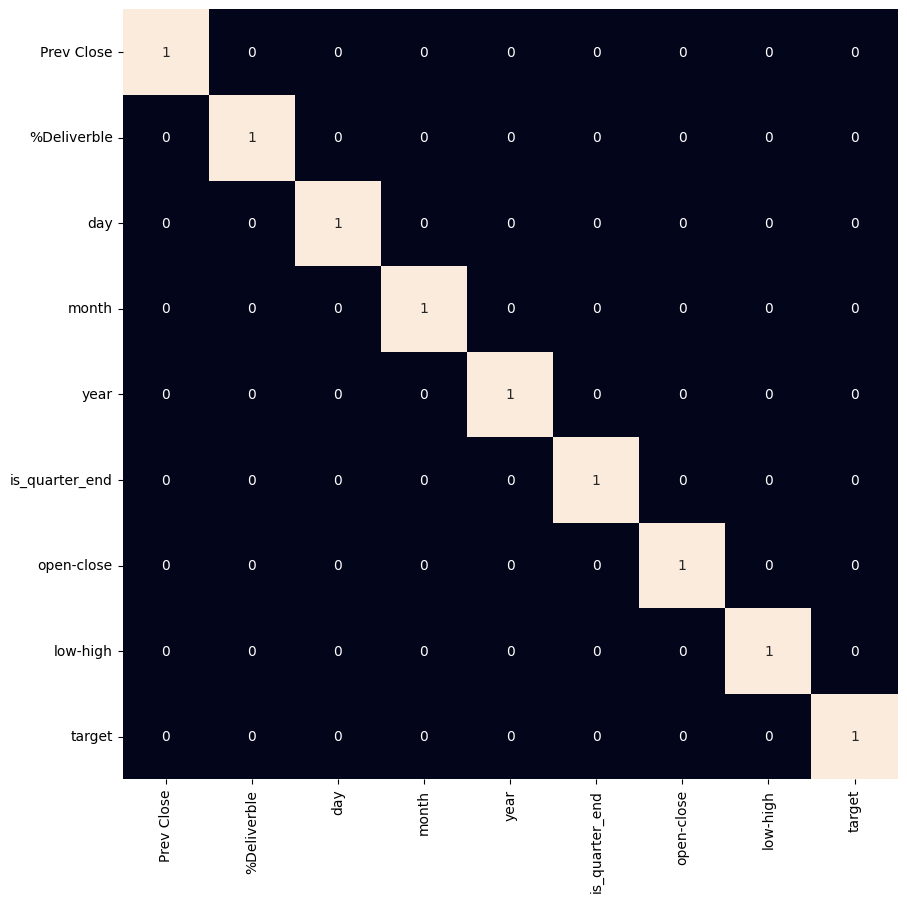

In [340]:
plt.figure(figsize=(10, 10)) 

sb.heatmap(df.drop({'Date', 'Symbol', 'Series', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume', 'Turnover', 'Deliverable Volume'}, axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()



In [341]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape)


(2687, 3) (672, 3)


In [342]:
model = XGBClassifier(
    learning_rate=0.14,
    booster="gblinear",
)

model.fit(X_train, Y_train)

print(f"{model.__class__.__name__} :")
print("Training Accuracy :", metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1]))
print("Validation Accuracy :", metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1]))



XGBClassifier :
Training Accuracy : 0.9124648090266232
Validation Accuracy : 0.916858590511285


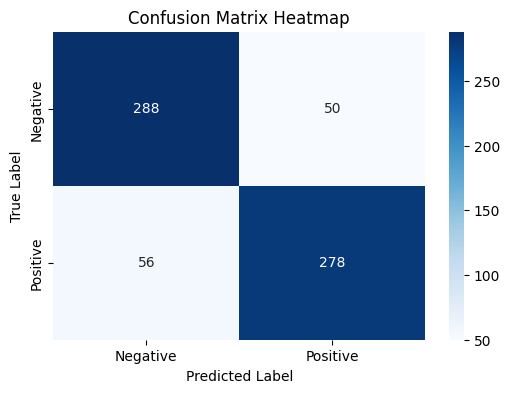

True Negative:  288
False Negative:  50
False Positive:  56
True Positive:  278


In [343]:


cm = confusion_matrix(Y_valid, model.predict(X_valid))

plt.figure(figsize=(6,4))
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")

plt.show()

confusionData = cm.ravel()
print("True Negative: ", confusionData[0])
print("False Negative: ", confusionData[1])
print("False Positive: ", confusionData[2])
print("True Positive: ", confusionData[3])


In [344]:
model.save_model(fname="stock-pred-model.json")